# **Proyecto Final NLP - Notebook 5**

## **¿Que más se podría hacer?**

## _Tome cualquiera de estas propuestas o alguna suya y desarrolle_

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# **TSNE de Embeddings para armar interpretación:**

El objetivos es armar un TSNE para ver si los embeddings entrenados con el modelo de CNN que mejor Score obtuve, tienen alguna relación o interpretación detectable.

# Probamos con los embeddings del modelo de red Bidirectional + LSTM de R2= 0.6205

     |████████████████████████████████| 22.3 MB 1.4 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 2.121439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.183205
[t-SNE] KL divergence after 1000 iterations: 0.378862
{'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '/': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '=': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, '_': 27, 'c': 28, 'Cl': 29, 'Br': 30, 'n': 31, 'o': 32, 's': 33, '@': 34, '.': 35, 'a': 36, 'B': 37, 'e': 38, 'i': 39, '9': 40, '10': 41, '11': 42}


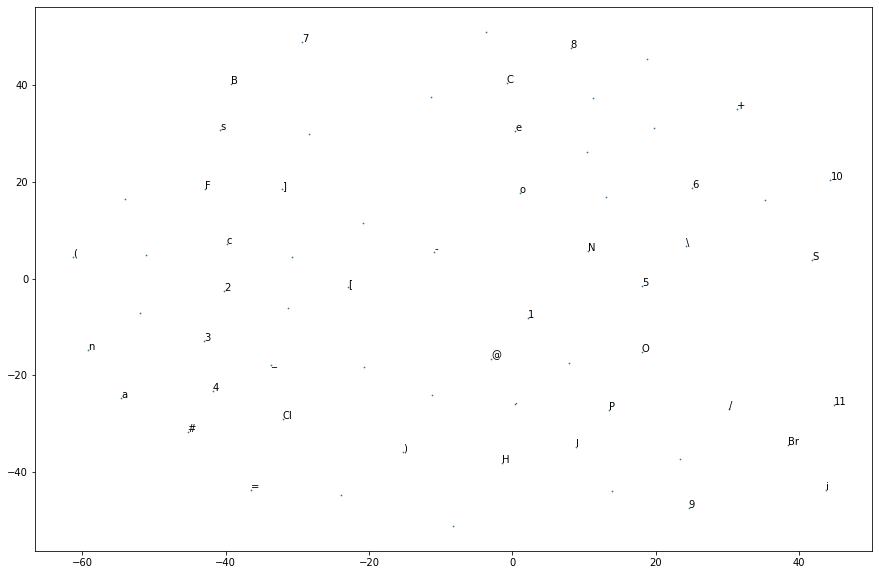

In [ ]:
! pip install rdkit-pypi

# Importo Librerías
from tensorflow.keras.models import load_model
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from datagen import smiles_dict
from matplotlib import pyplot as plt

# Armo función de R2
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Importo Modelo
model_loaded = load_model('fifth_model_0.6205.h5', custom_objects={'R2': R2})

# Saco pesos de embeddings
embeddings = model_loaded.layers[1].get_weights()[0]

# Instancio un TS! pip install rdkit-pypi

# Importo Librerías
from tensorflow.keras.models import load_model
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from datagen import smiles_dict
from matplotlib import pyplot as plt

# Armo función de R2
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Importo Modelo
model_loaded = load_model('fifth_model_0.6205.h5', custom_objects={'R2': R2})

# Saco pesos de embeddings
embeddings = model_loaded.layers[1].get_weights()[0]

# Instancio un TSNE de dos dimensiones para graficar y lo entreno con los embeddings
tsne = TSNE(2, verbose=1)
embed_2d = tsne.fit_transform(embeddings)

# Instancio los smiles
print(smiles_dict)
reverse_index = dict([(value, key) for (key, value) in smiles_dict.items()])

# Grafico
plt.figure(figsize=(15,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s = 0.5)
for smile in smiles_dict.keys():
  plt.text(embed_2d[smiles_dict[smile]-1][0], embed_2d[smiles_dict[smile]-1][1],reverse_index[smiles_dict[smile]])
plt.show()

## Conclusión:


_No observo evidencia de que haya algún tipo de correlación entre los embeddigs de la CNN entrenada._

# Probamos con los embeddings del modelo de red Bidirectional + LSTM de R2= 0.6483

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.001s...
[t-SNE] Computed neighbors for 64 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 2.514652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.415356
[t-SNE] KL divergence after 1000 iterations: 0.501972
{'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '/': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '=': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, '_': 27, 'c': 28, 'Cl': 29, 'Br': 30, 'n': 31, 'o': 32, 's': 33, '@': 34, '.': 35, 'a': 36, 'B': 37, 'e': 38, 'i': 39, '9': 40, '10': 41, '11': 42}


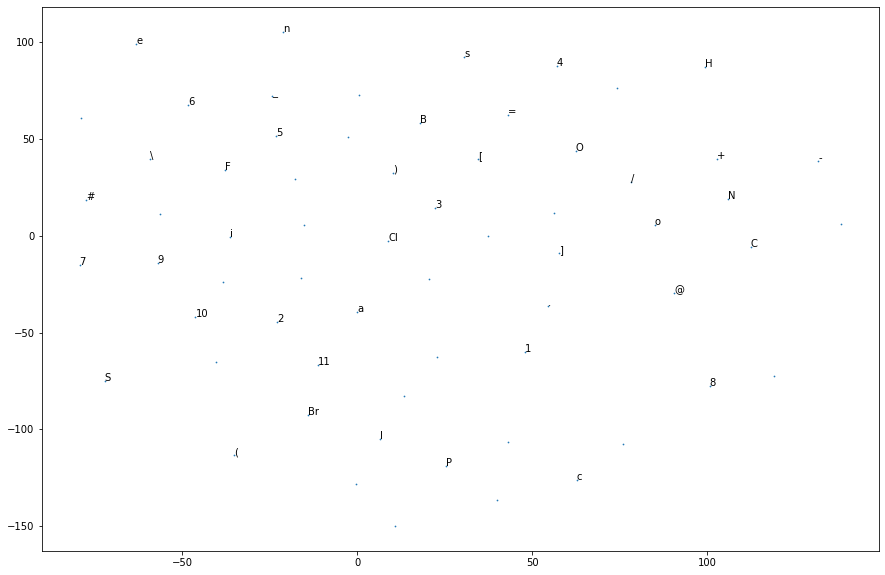

In [2]:
! pip install rdkit-pypi

# Importo Librerías
from tensorflow.keras.models import load_model
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from datagen import smiles_dict
from matplotlib import pyplot as plt

# Armo función de R2
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Importo Modelo
model_loaded = load_model('first_model_0.6483.h5', custom_objects={'R2': R2})

# Saco pesos de embeddings
embeddings = model_loaded.layers[1].get_weights()[0]

# Instancio un TSNE de dos dimensiones para graficar y lo entreno con los embeddings
tsne = TSNE(2, verbose=1)
embed_2d = tsne.fit_transform(embeddings)

# Instancio los smiles
print(smiles_dict)
reverse_index = dict([(value, key) for (key, value) in smiles_dict.items()])

# Grafico
plt.figure(figsize=(15,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s = 0.5)
for smile in smiles_dict.keys():
  plt.text(embed_2d[smiles_dict[smile]-1][0], embed_2d[smiles_dict[smile]-1][1],reverse_index[smiles_dict[smile]])
plt.show()


## Conclusión:

_No observo evidencia de que haya algún tipo de correlación entre los embeddigs de la CNN entrenada._

# Probamos los Embeddings de un modelo de Text CNN, de R2= 0.5754

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 41 nearest neighbors...
[t-SNE] Indexed 42 samples in 0.000s...
[t-SNE] Computed neighbors for 42 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 42 / 42
[t-SNE] Mean sigma: 0.637027
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.364601
[t-SNE] KL divergence after 1000 iterations: 0.452251
{'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '/': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '=': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, '_': 27, 'c': 28, 'Cl': 29, 'Br': 30, 'n': 31, 'o': 32, 's': 33, '@': 34, '.': 35, 'a': 36, 'B': 37, 'e': 38, 'i': 39, '9': 40, '10': 41, '11': 42}


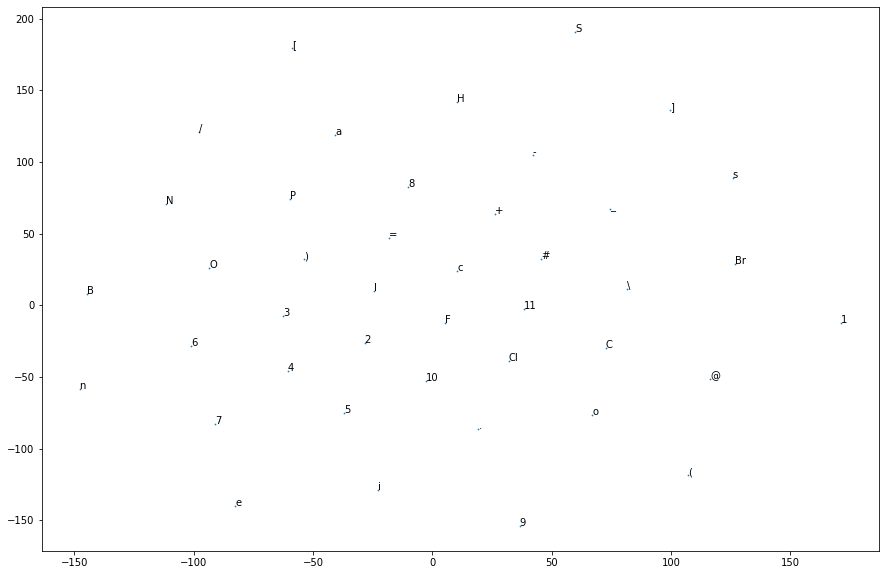

In [3]:
# Importo Librerías
from tensorflow.keras.models import load_model
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from datagen import smiles_dict
from matplotlib import pyplot as plt

# Armo función de R2
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Importo Modelo
model_loaded = load_model('text_cnn_Model2_100epoch_X1_sindropout.h5', custom_objects={'R2': R2})

# Saco pesos de embeddings
embeddings = model_loaded.layers[1].get_weights()[0]

# Instancio un TSNE de dos dimensiones para graficar y lo entreno con los embeddings
tsne = TSNE(2, verbose=1)
embed_2d = tsne.fit_transform(embeddings)

# Instancio los smiles
print(smiles_dict)
reverse_index = dict([(value, key) for (key, value) in smiles_dict.items()])

# Grafico
plt.figure(figsize=(15,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s = 0.5)
for smile in smiles_dict.keys():
  plt.text(embed_2d[smiles_dict[smile]-1][0], embed_2d[smiles_dict[smile]-1][1],reverse_index[smiles_dict[smile]])
plt.show()

## Conclusión:

_No observo evidencia de que haya algún tipo de correlación entre los embeddigs de la CNN entrenada._